## Importing the data and necessary libraries 

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas import DataFrame 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
df = pd.read_csv('CC GENERAL.csv')

In [4]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Preprocessing the data and applying PCA

1. Dropping Customer ID as it does not provide useful information for clustering
2. Standardising and Normalising the data. This prevents one attribute from having a greater influence on clustering than another as the data is now uniform. 
3. Creating DataFrame of the uniform  data.
4. Applying PCA to reduce the data to 2 dimensions. This data is plotted. 

In [5]:
df1 = df.drop('CUST_ID', axis = 1) 
df1.fillna(method ='bfill', inplace = True) 

In [6]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df1) 

In [7]:
# Normalizing the Data 
normalized_df = normalize(df1) 

In [8]:
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 

In [9]:
# Reducing the dimensions of the data 
pca = PCA(n_components = 3) 
pcadf = pca.fit_transform(normalized_df) 
pcadf = pd.DataFrame(pcadf) 
pcadf.columns = ['Principal Component 1', 'Principal Component 2', 'Principal Component 3'] 
  
pcadf.head(10)

,Principal Component 1,Principal Component 2,Principal Component 3
0,-0.315801,-0.045331,0.021005
1,0.315592,-0.156902,0.369849
2,-0.207156,-0.182853,-0.122065
3,-0.294886,-0.115253,-0.105940
4,0.140351,-0.089815,-0.090702
5,0.357316,0.198259,-0.407317
6,-0.196032,0.372616,-0.000407
7,0.114108,-0.126426,-0.256003
8,-0.325109,-0.103615,-0.032240
9,-0.402152,-0.055033,0.042919


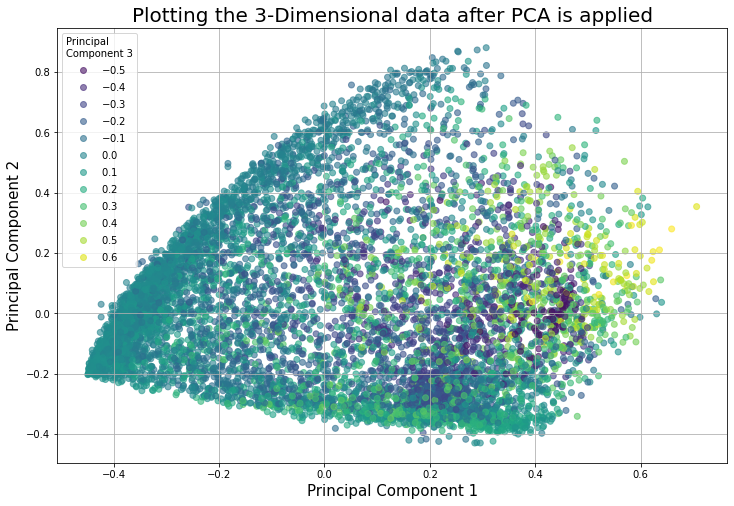

In [10]:
fig, ax = plt.subplots(figsize=(12, 8))
scatter = ax.scatter(pcadf['Principal Component 1'],
                     pcadf['Principal Component 2'], 
                     c = pcadf['Principal Component 3'],
                     alpha=0.6)
plt.title('Plotting the 3-Dimensional data after PCA is applied', fontsize = 20)
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.legend(*scatter.legend_elements(), loc="best", title="Principal\nComponent 3")
ax.plot([])
ax.grid()
plt.show()

In [11]:
pca.explained_variance_ratio_

array([0.33143791, 0.2751133 , 0.16474062])

## Elbow Method 

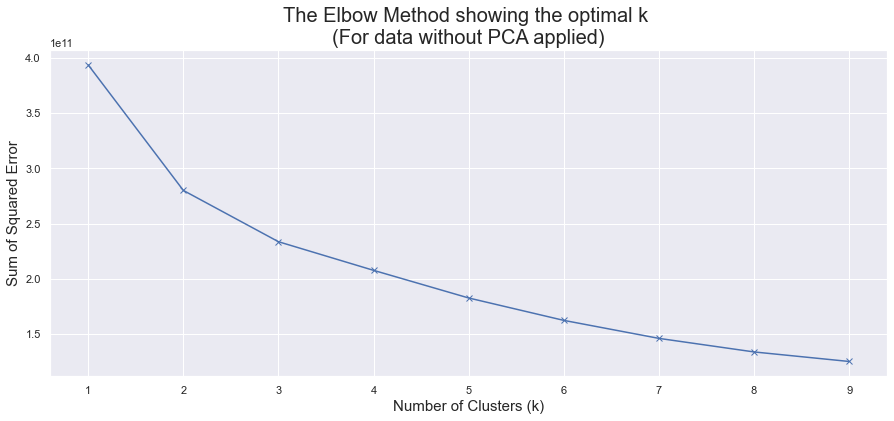

In [97]:
import seaborn as sns; sns.set()

sse = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df1)
    sse.append(kmeanModel.inertia_)
plt.figure(figsize=(15,6))
plt.plot(K, sse, 'bx-')
plt.xlabel('Number of Clusters (k)', fontsize = 15)
plt.ylabel('Sum of Squared Error', fontsize = 15)
plt.title('The Elbow Method showing the optimal k \n(For data without PCA applied)', fontsize = 20)
plt.show()

We will choose 3 as k value here

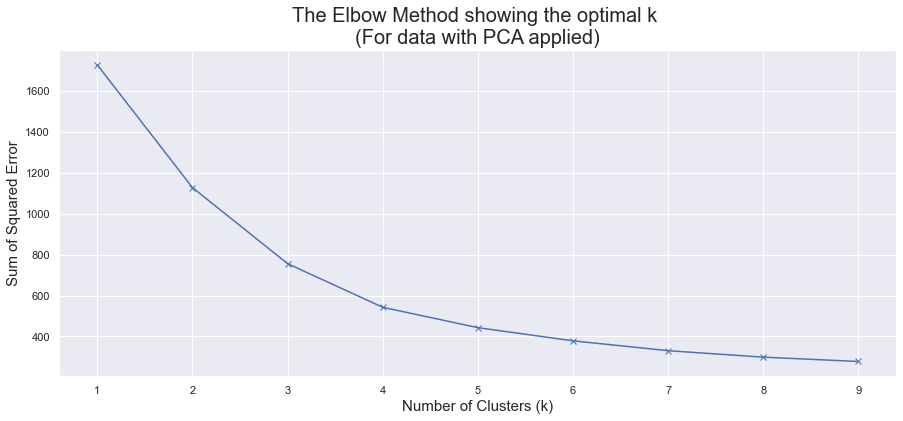

In [101]:
import seaborn as sns; sns.set()

sse = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(pcadf)
    sse.append(kmeanModel.inertia_)
plt.figure(figsize=(15,6))
plt.plot(K, sse, 'bx-')
plt.xlabel('Number of Clusters (k)', fontsize = 15)
plt.ylabel('Sum of Squared Error', fontsize = 15)
plt.title('The Elbow Method showing the optimal k \n(For data with PCA applied)', fontsize = 20)
plt.show()

We will choose k as 3 here 

In [112]:
import matplotlib
matplotlib.rc_file_defaults()

## Applying the Gaussian Mixture Model to cluster our data (PCA-applied) into 3 clusters

In [113]:
gmm = GaussianMixture(n_components = 3) 
gmm.fit(pcadf)

GaussianMixture(n_components=3)

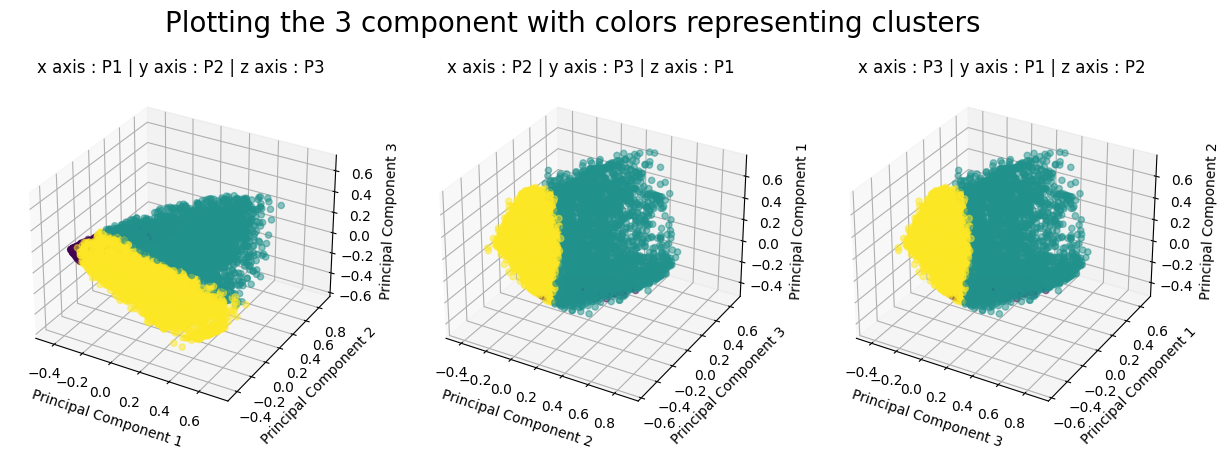

In [116]:
fig = plt.figure(figsize = (15, 5))
plt.suptitle("Plotting the 3 component with colors representing clusters", fontsize = 20)
             
x = pcadf['Principal Component 1']
y = pcadf['Principal Component 2']
z = pcadf['Principal Component 3']

s1 = "Principal Component 1"
s2 = "Principal Component 2"
s3 = "Principal Component 3"

c = gmm.fit_predict(pcadf)

ax = fig.add_subplot(131, projection = '3d')
ax.scatter(x, y, z, c = c, alpha = 0.5)
plt.title('x axis : P1 | y axis : P2 | z axis : P3')
ax.set_xlabel(s1)
ax.set_ylabel(s2)
ax.set_zlabel(s3)

ax = fig.add_subplot(132, projection = '3d')
ax.scatter(y, z, x, c = c, alpha = 0.5)
plt.title('x axis : P2 | y axis : P3 | z axis : P1')
ax.set_xlabel(s2)
ax.set_ylabel(s3)
ax.set_zlabel(s1)

ax = fig.add_subplot(133, projection = '3d')
ax.scatter(y, z, x, c = c, alpha = 0.5)
plt.title('x axis : P3 | y axis : P1 | z axis : P2')
ax.set_xlabel(s3)
ax.set_ylabel(s1)
ax.set_zlabel(s2)

plt.show()

## Applying the Gaussian Mixture Model to cluster our data (without PCA) into 3 clusters

In [117]:
gmm1 = GaussianMixture(n_components = 3) 
gmm1.fit(df1)

GaussianMixture(n_components=3)

## External Evaluation Metric (Silhoutte Score)

#### 1. For data on which PCA was applied: 

In [118]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = pcadf
y = c
print("Clusters\tSilhoutte Score\n")
for n_components in range(2, 11):
    gmm = GaussianMixture(n_components=n_components).fit(X)
    sil_coeff = silhouette_score(X, c, metric='euclidean')
    print("k = {} \t--> \t{}".format(n_components, sil_coeff))

Clusters	Silhoutte Score

k = 2 	--> 	0.2851862501900935
k = 3 	--> 	0.2851862501900935
k = 4 	--> 	0.2851862501900935
k = 5 	--> 	0.2851862501900935
k = 6 	--> 	0.2851862501900935
k = 7 	--> 	0.2851862501900935
k = 8 	--> 	0.2851862501900935
k = 9 	--> 	0.2851862501900935
k = 10 	--> 	0.2851862501900935


#### For data on which PCA was not applied:

In [119]:
X = df1
y = gmm1.fit_predict(df1)
print("Clusters\tSilhoutte Score\n")
for n_components in range(2, 11):
    gmm = GaussianMixture(n_components=n_components).fit(X)
    sil_coeff = silhouette_score(X, y, metric='euclidean')
    print("k = {} \t--> \t{}".format(n_components, sil_coeff))

Clusters	Silhoutte Score

k = 2 	--> 	0.02309829602266074
k = 3 	--> 	0.02309829602266074
k = 4 	--> 	0.02309829602266074
k = 5 	--> 	0.02309829602266074
k = 6 	--> 	0.02309829602266074
k = 7 	--> 	0.02309829602266074
k = 8 	--> 	0.02309829602266074
k = 9 	--> 	0.02309829602266074
k = 10 	--> 	0.02309829602266074
